<h1 align='center' style='color:blue'>Credit Risk Modeling Project</h1>

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

### Data Load

In [3]:
df_customer = pd.read_csv("customers.csv")
df_loans = pd.read_csv("loans.csv")
df_bureau = pd.read_csv("bureau_data.csv")

In [4]:
df_customer.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [5]:
df = pd.merge(df_customer, df_loans, on='cust_id')
df.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False


In [6]:
df = pd.merge(df, df_bureau)
df.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [8]:
df['default'] = df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

Clearly there is a class imbalance we will handle this issue later on

In [9]:
df.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,0,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,0,3,1,96,12,60,5,4


### Train Test Split

In [10]:
X = df.drop("default", axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

df_train = pd.concat([X_train, y_train], axis='columns')
df_test = pd.concat([X_test, y_test], axis='columns')

We perform train test split before doing EDA to prevent data leakage.

<h3 align='center' style='color:blue'>Data Cleaning</h1>

### Handle Missing & Duplicate Values

In [11]:
df_train.shape

(37500, 33)

In [12]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [13]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [14]:
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [15]:
df_train.residence_type.fillna(mode_residence, inplace=True)
df_test.residence_type.fillna(mode_residence, inplace=True)
df_train.residence_type.unique(), df_test.residence_type.unique()

C:\Users\Ayush Rajput\AppData\Local\Temp\ipykernel_2728\1795015182.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace=True)
C:\Users\Ayush Rajput\AppData\Local\Temp\ipykernel_2728\1795015182.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

(array(['Owned', 'Mortgage', 'Rented'], dtype=object),
 array(['Owned', 'Rented', 'Mortgage'], dtype=object))

In [16]:
df_train.duplicated().sum()

np.int64(0)

In [17]:
df_train.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
count,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,...,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00,37500.00
mean,39.56,2636054.83,1.94,15.99,418768.57,4706706.56,4002796.64,80724.11,720503.40,3202237.31,...,1336077.19,987467.44,2.50,1.00,76.00,4.89,26.94,5.00,43.33,0.09
std,9.85,2624140.92,1.54,8.94,168831.82,6288692.94,5400902.41,120830.65,972162.43,4320721.92,...,1213733.93,1045108.58,1.12,0.82,43.71,5.86,32.93,2.02,29.36,0.28
min,18.00,0.00,0.00,1.00,110001.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
25%,33.00,803000.00,0.00,8.00,302001.00,1136000.00,959000.00,19180.00,172620.00,767200.00,...,423931.00,286189.50,1.00,0.00,42.00,0.00,0.00,4.00,18.00,0.00
50%,40.00,1884000.00,2.00,16.00,400001.00,2651000.00,2234000.00,44700.00,402120.00,1787200.00,...,1000881.50,666825.00,2.00,1.00,71.00,3.00,14.00,5.00,39.00,0.00
75%,46.00,3332000.00,3.00,24.00,560001.00,5159000.00,4597250.00,92000.00,827505.00,3677800.00,...,1789091.75,1236740.50,3.00,2.00,107.00,9.00,46.00,6.00,67.00,0.00
max,70.00,11999000.00,5.00,31.00,700001.00,52175000.00,47667000.00,5698029.90,8580060.00,38133600.00,...,5000000.00,7846643.00,4.00,2.00,223.00,24.00,171.00,9.00,99.00,1.00


In [18]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [19]:
columns_continuous = ['age', 'income', 'years_at_current_address', 'number_of_dependants',
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
                     'principal_outstanding', 'bank_balance_at_application', 'number_of_open_accounts', 'number_of_closed_accounts',
                     'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

In [20]:
columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type',
                      'city', 'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

### Box plot to visualize outliers

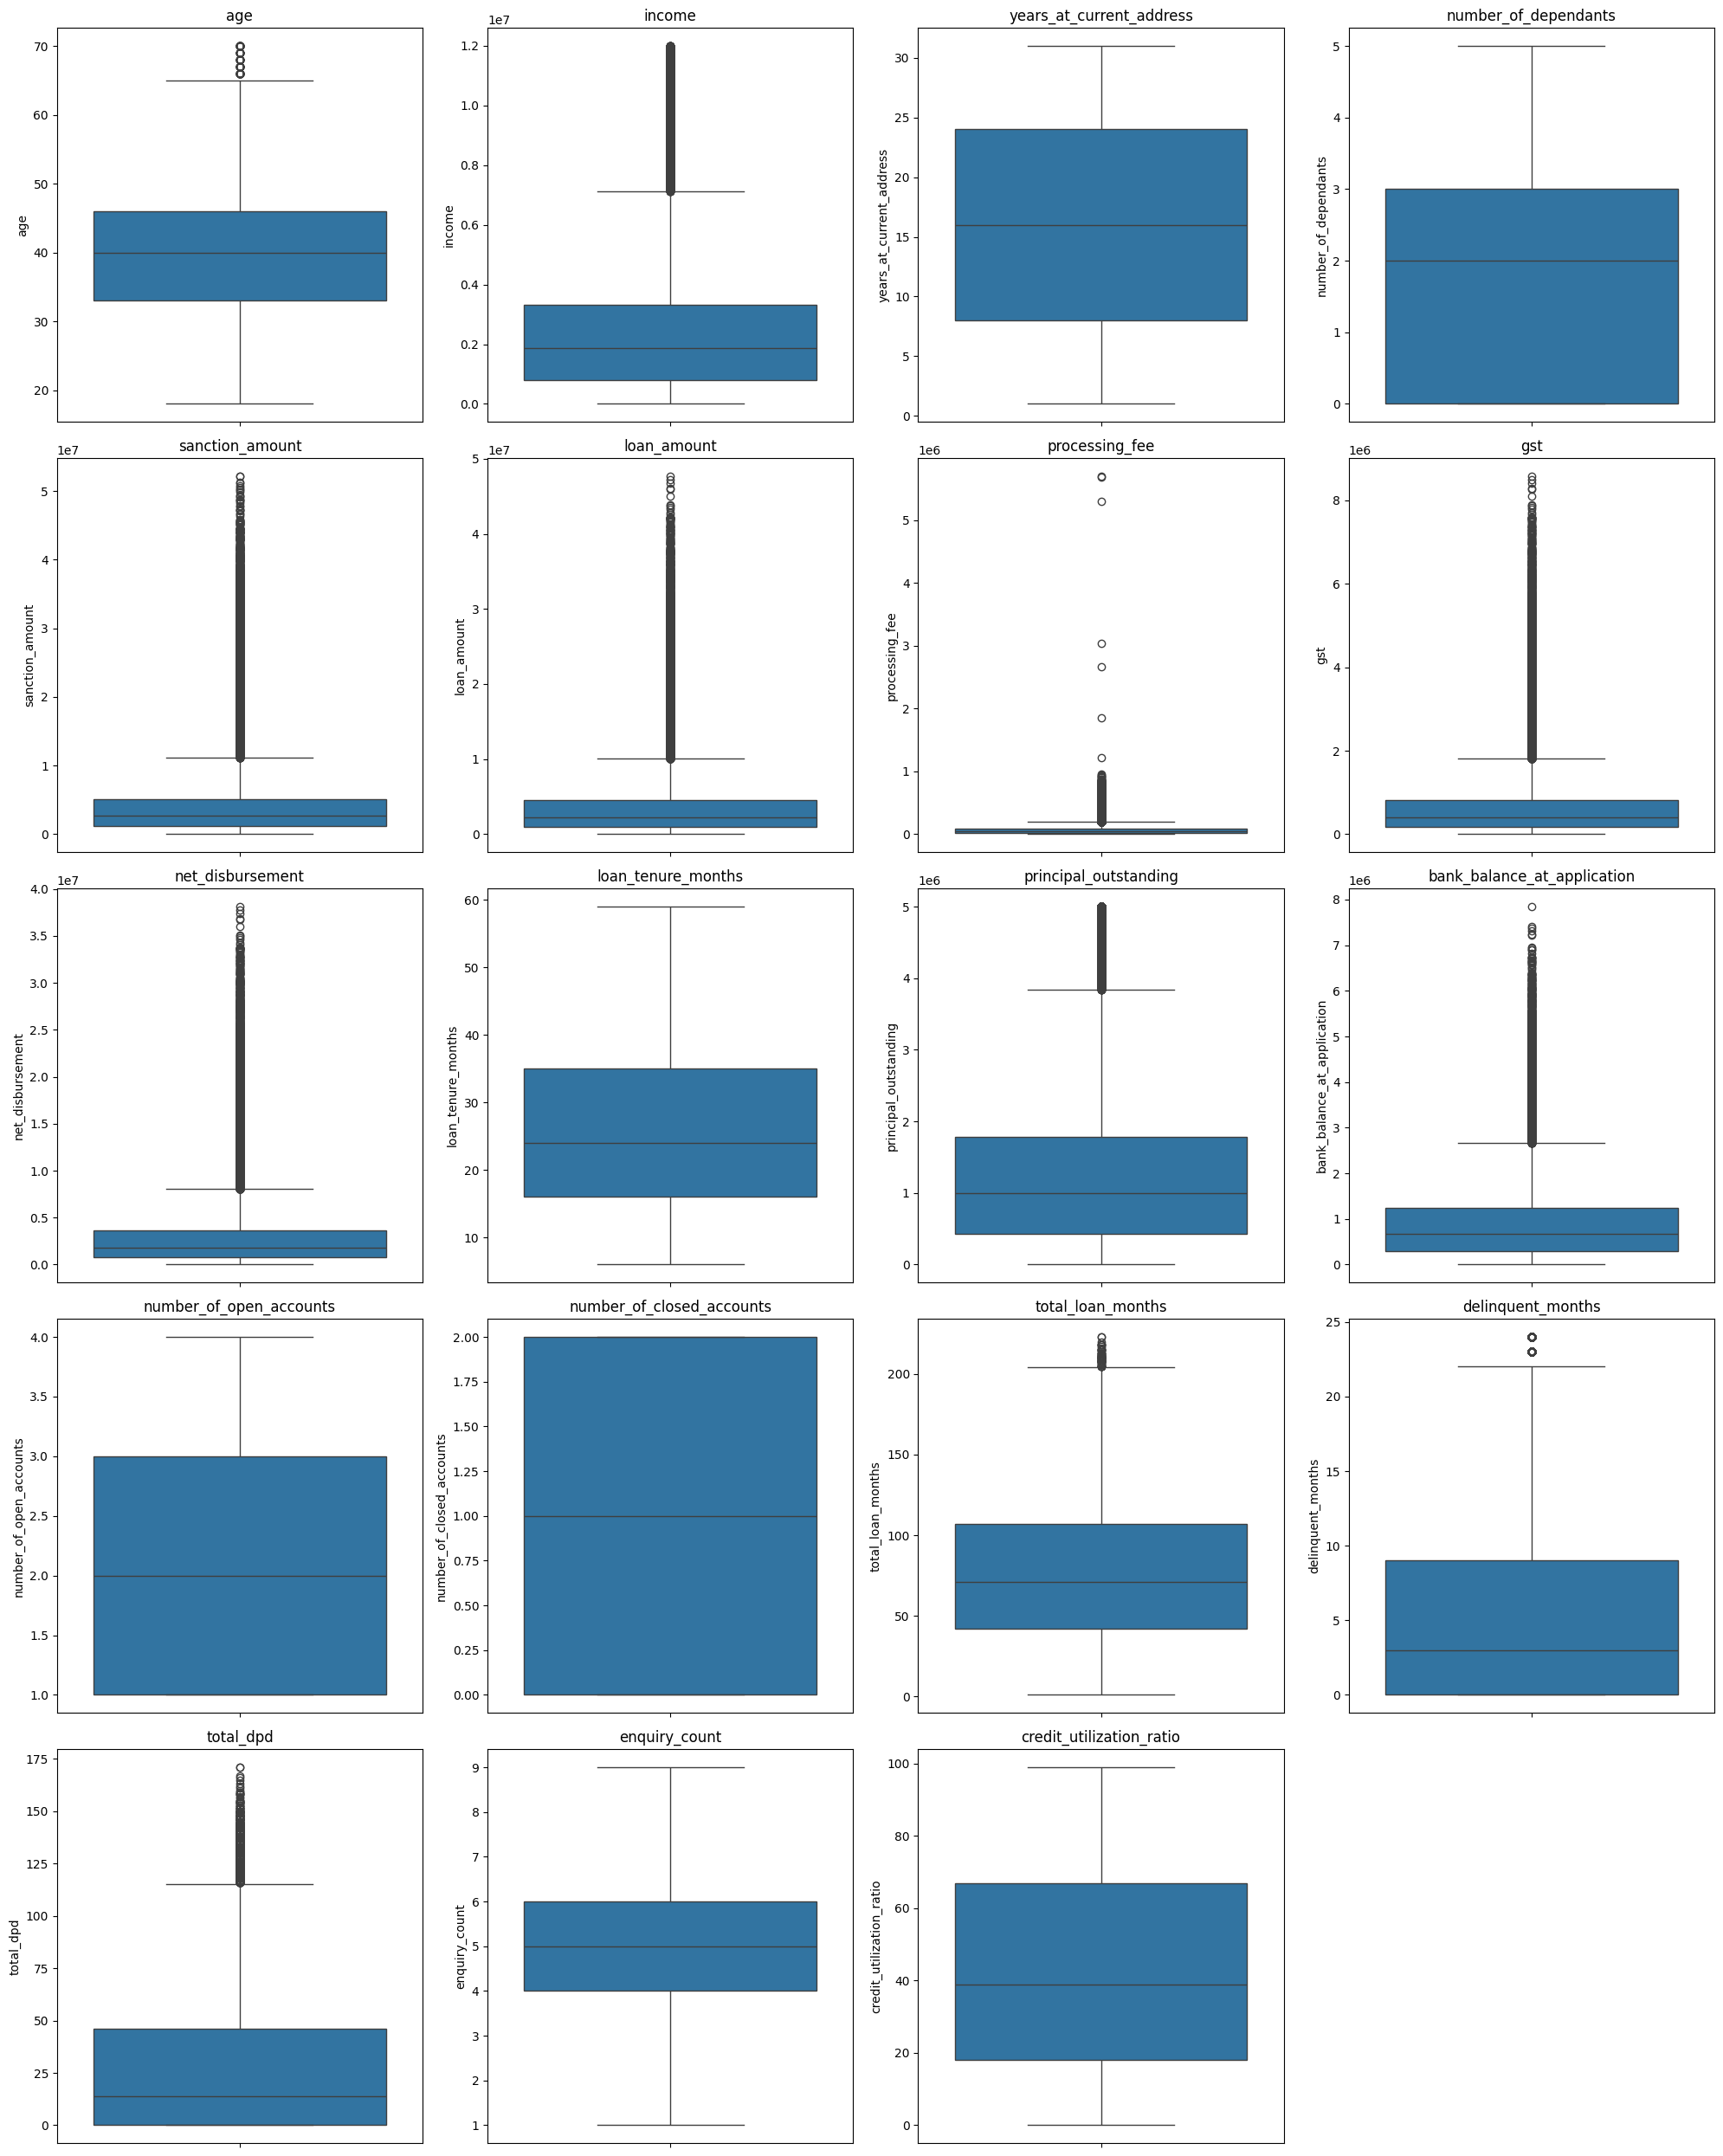

In [21]:
num_cols = len(columns_continuous)
cols_per_row = 4
rows = (num_cols + cols_per_row - 1) // cols_per_row  # calculate number of rows needed

plt.figure(figsize=(20, 5 * rows))  # width, height

for idx, col in enumerate(columns_continuous):
    plt.subplot(rows, cols_per_row, idx + 1)
    sns.boxplot(y=df_train[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

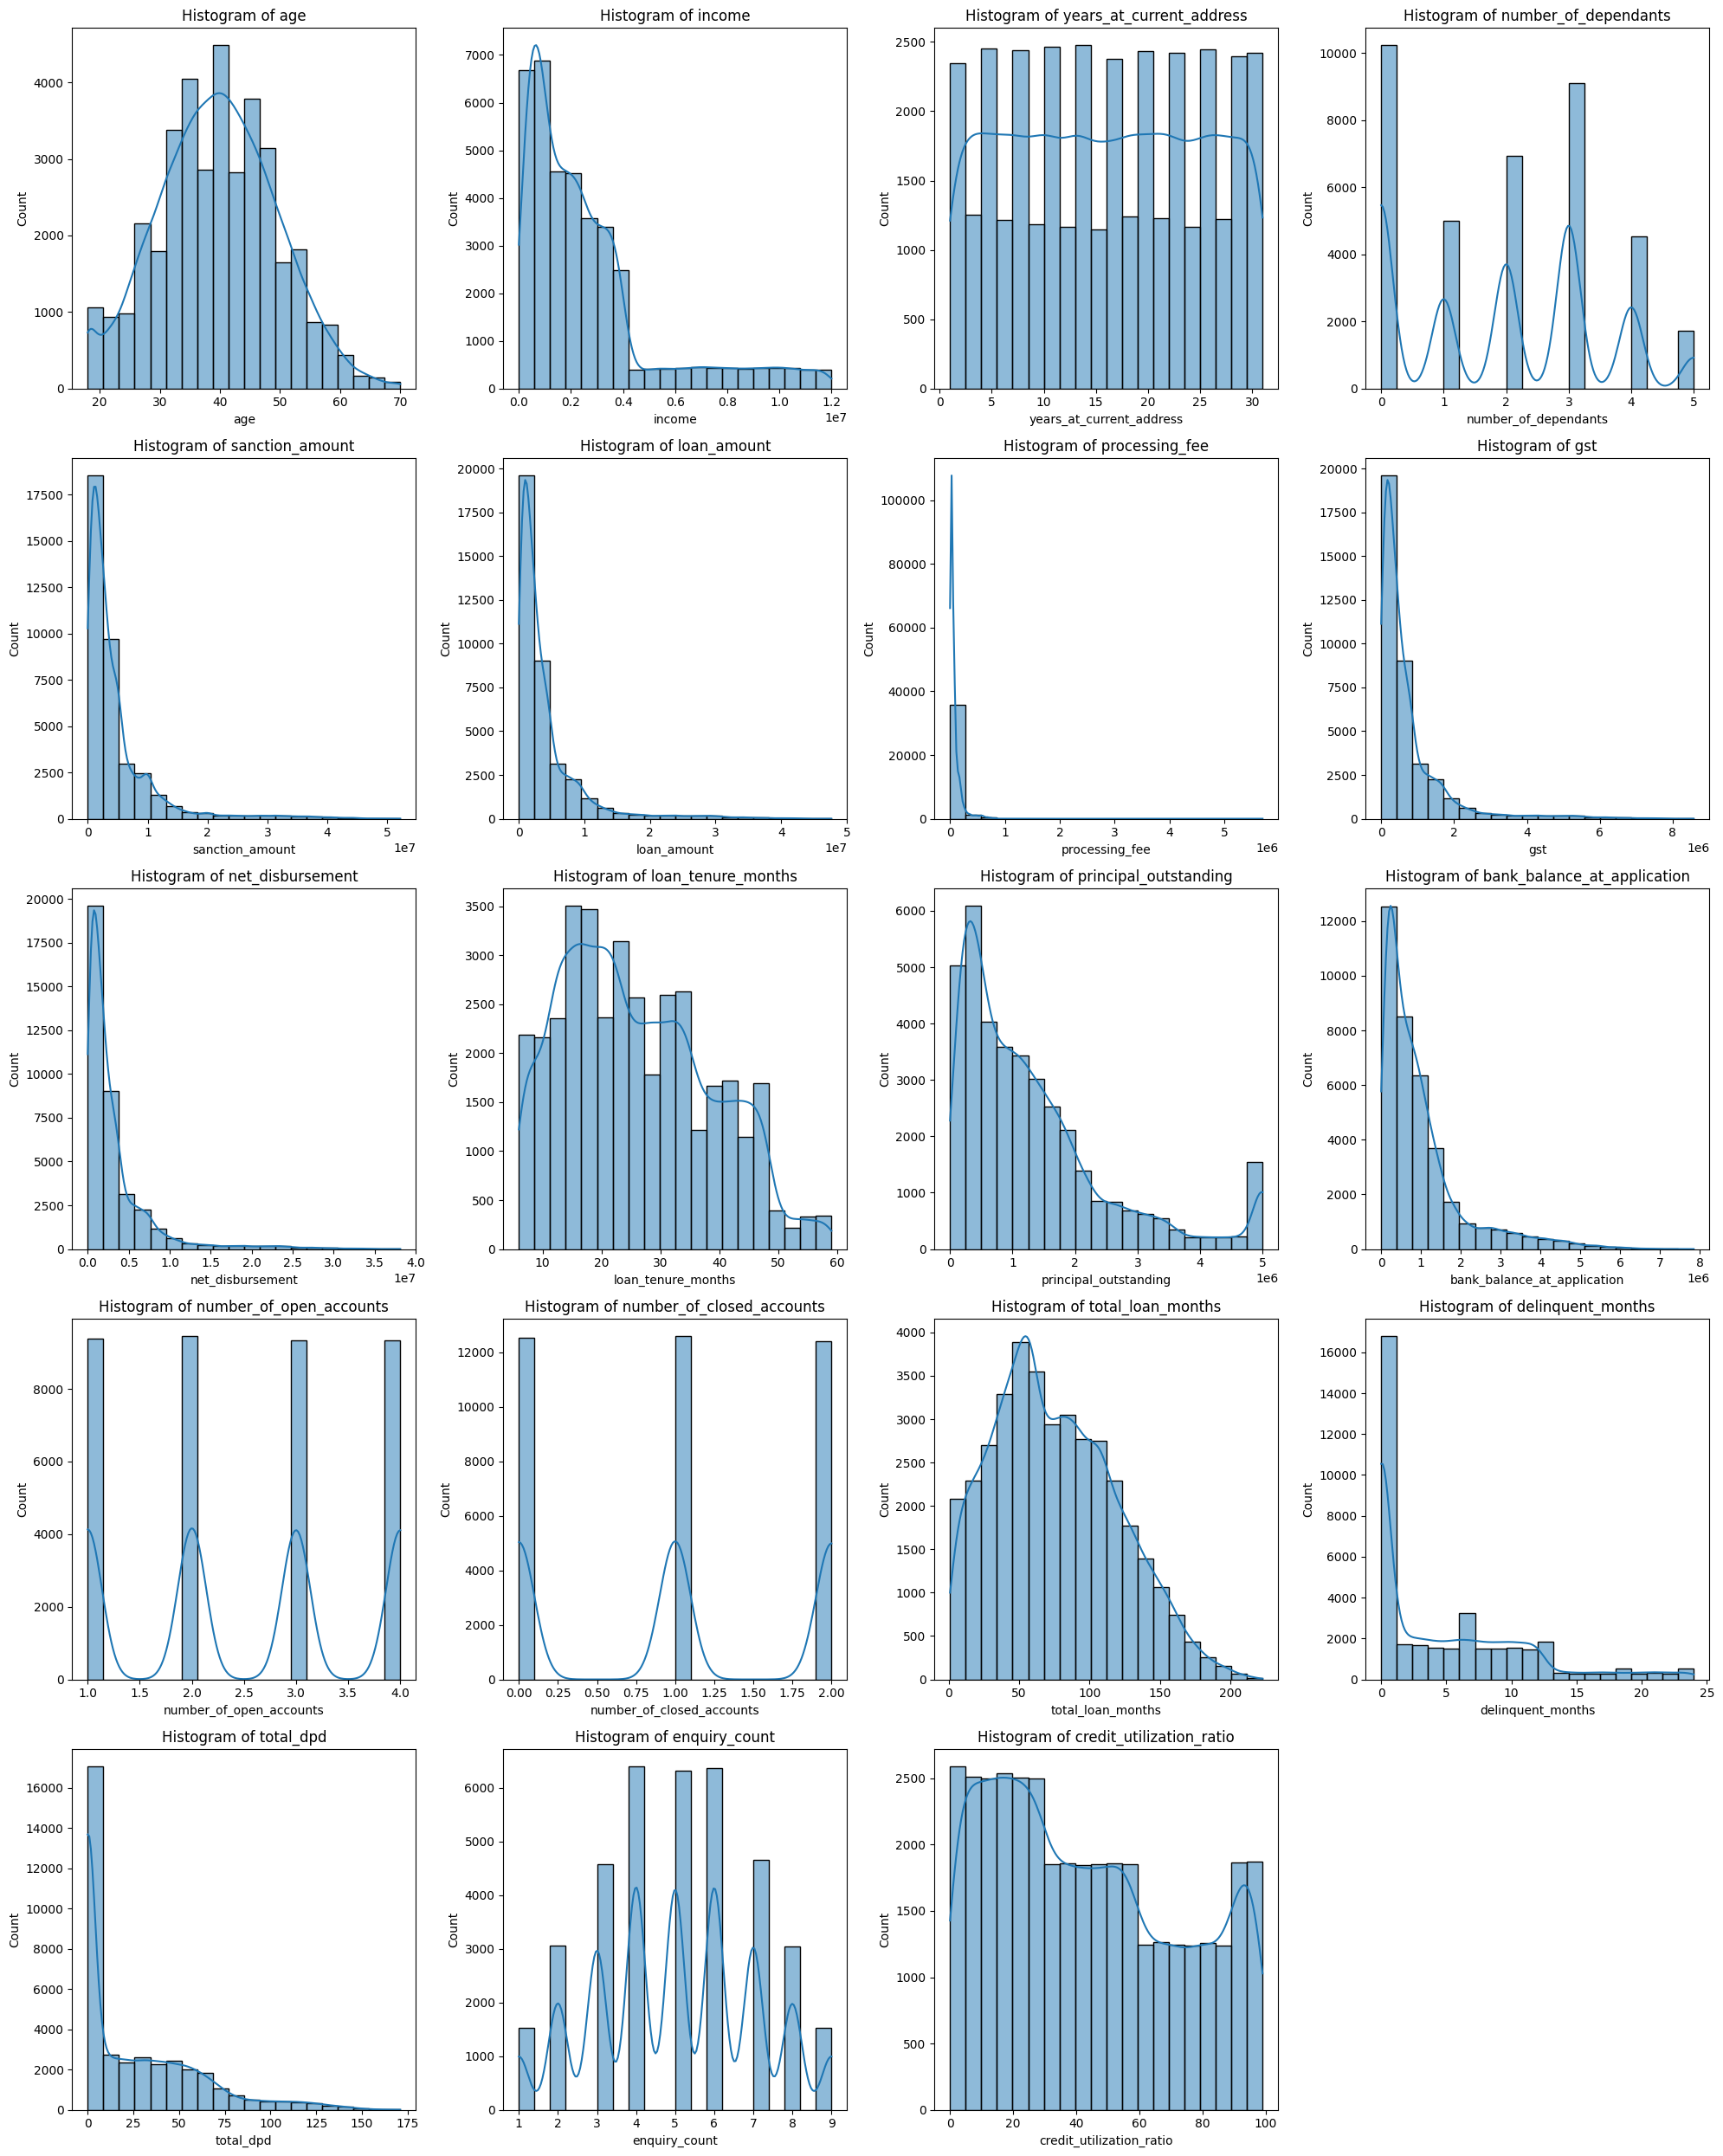

In [22]:
num_cols = len(columns_continuous)
cols_per_row = 4
rows = (num_cols + cols_per_row - 1) // cols_per_row  # calculate number of rows needed

plt.figure(figsize=(20, 5 * rows))  # width, height

for idx, col in enumerate(columns_continuous):
    plt.subplot(rows, cols_per_row, idx + 1)
    sns.histplot(df_train[col], kde=True, bins=20)  # Add KDE (Kernel Density Estimation) curve for smoother histogram
    plt.title(f'Histogram of {col}')
    plt.tight_layout()

plt.show()

Processing fee feature is very much skewed in one direction, it is potentially have some problem & requires further investigation

### Outliers Treatment: Processing_fee

In [23]:
df_train.processing_fee.describe()

count     37500.00
mean      80724.11
std      120830.65
min           0.00
25%       19180.00
50%       44700.00
75%       92000.00
max     5698029.90
Name: processing_fee, dtype: float64

In [24]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.02
9898,3626000,5293543.52
47089,1738000,1858964.77
33705,3812000,5678020.86
12294,4639000,5698029.90
28174,966000,1214492.67
29305,2616000,3036378.01


In [25]:
df_train_1 = df_train[df_train.processing_fee/df_train.loan_amount<0.03].copy()
df_train_1.shape

(37487, 33)

In [26]:
df_test.residence_type.isna().sum()

np.int64(0)

In [27]:
# Applied same step on test set
df_test = df_test[df_test.processing_fee/df_test.loan_amount<0.03].copy()
df_test.shape

(12498, 33)

In [28]:
# GST should not be more than 20%
df_train_1[df_train_1.gst/df_train_1.loan_amount>0.2].shape

(0, 33)

In [29]:
# Net disbursement should not be higher than loan_amount
df_train_1[df_train_1.net_disbursement>df_train_1.loan_amount].shape

(0, 33)

### Analyze Categorical Columns

In [30]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [31]:
for col in columns_categorical:
    print(col, "==>", df_train_1[col].unique())

gender ==> ['F' 'M']
marital_status ==> ['Single' 'Married']
employment_status ==> ['Salaried' 'Self-Employed']
residence_type ==> ['Owned' 'Mortgage' 'Rented']
city ==> ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state ==> ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode ==> [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
loan_purpose ==> ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type ==> ['Secured' 'Unsecured']
default ==> [0 1]


### Fixed Error in Loan Purpose Column

In [32]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace("Personaal", "Personal")
df_train_1['loan_purpose'].unique()

array(['Home', 'Auto', 'Personal', 'Education'], dtype=object)

In [33]:
df_test['loan_purpose'] = df_test['loan_purpose'].replace("Personaal", "Personal")
df_test['loan_purpose'].unique()

array(['Education', 'Home', 'Auto', 'Personal'], dtype=object)

<h3 align='center' style='color:blue'>Exploratory Data Analytics</h3>

In [34]:
columns_continuous

['age',
 'income',
 'years_at_current_address',
 'number_of_dependants',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

### Age Column

In [35]:
df_train_1.groupby("default")['age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,34298.00,39.78,9.87,18.00,33.00,40.00,47.00,70.00
1,3189.00,37.25,9.37,18.00,31.00,37.00,44.00,70.00


**Insights**

1. Average age in the default group is little less (37.12) than the average (39.7) of the group that did not default
1. Variability (standard deviation) is mostly similar in both the groups
1. Both the groups have similar min and max ages

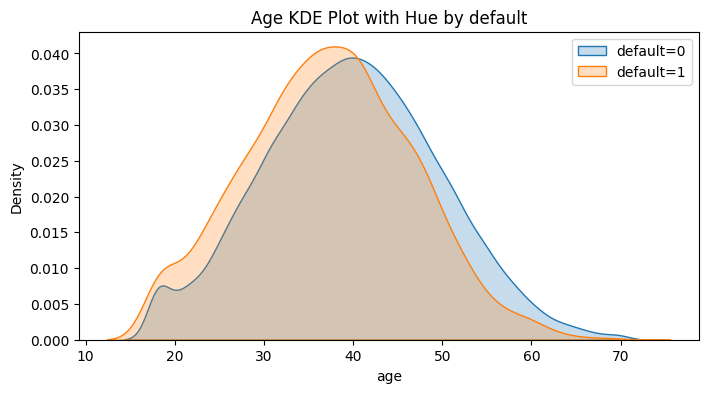

In [36]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['age'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['age'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Age KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**

1. Orange (defaulted) group is slightly shifted to left indicating that younger folks are more likely to default on their loans

### KDE for all columns

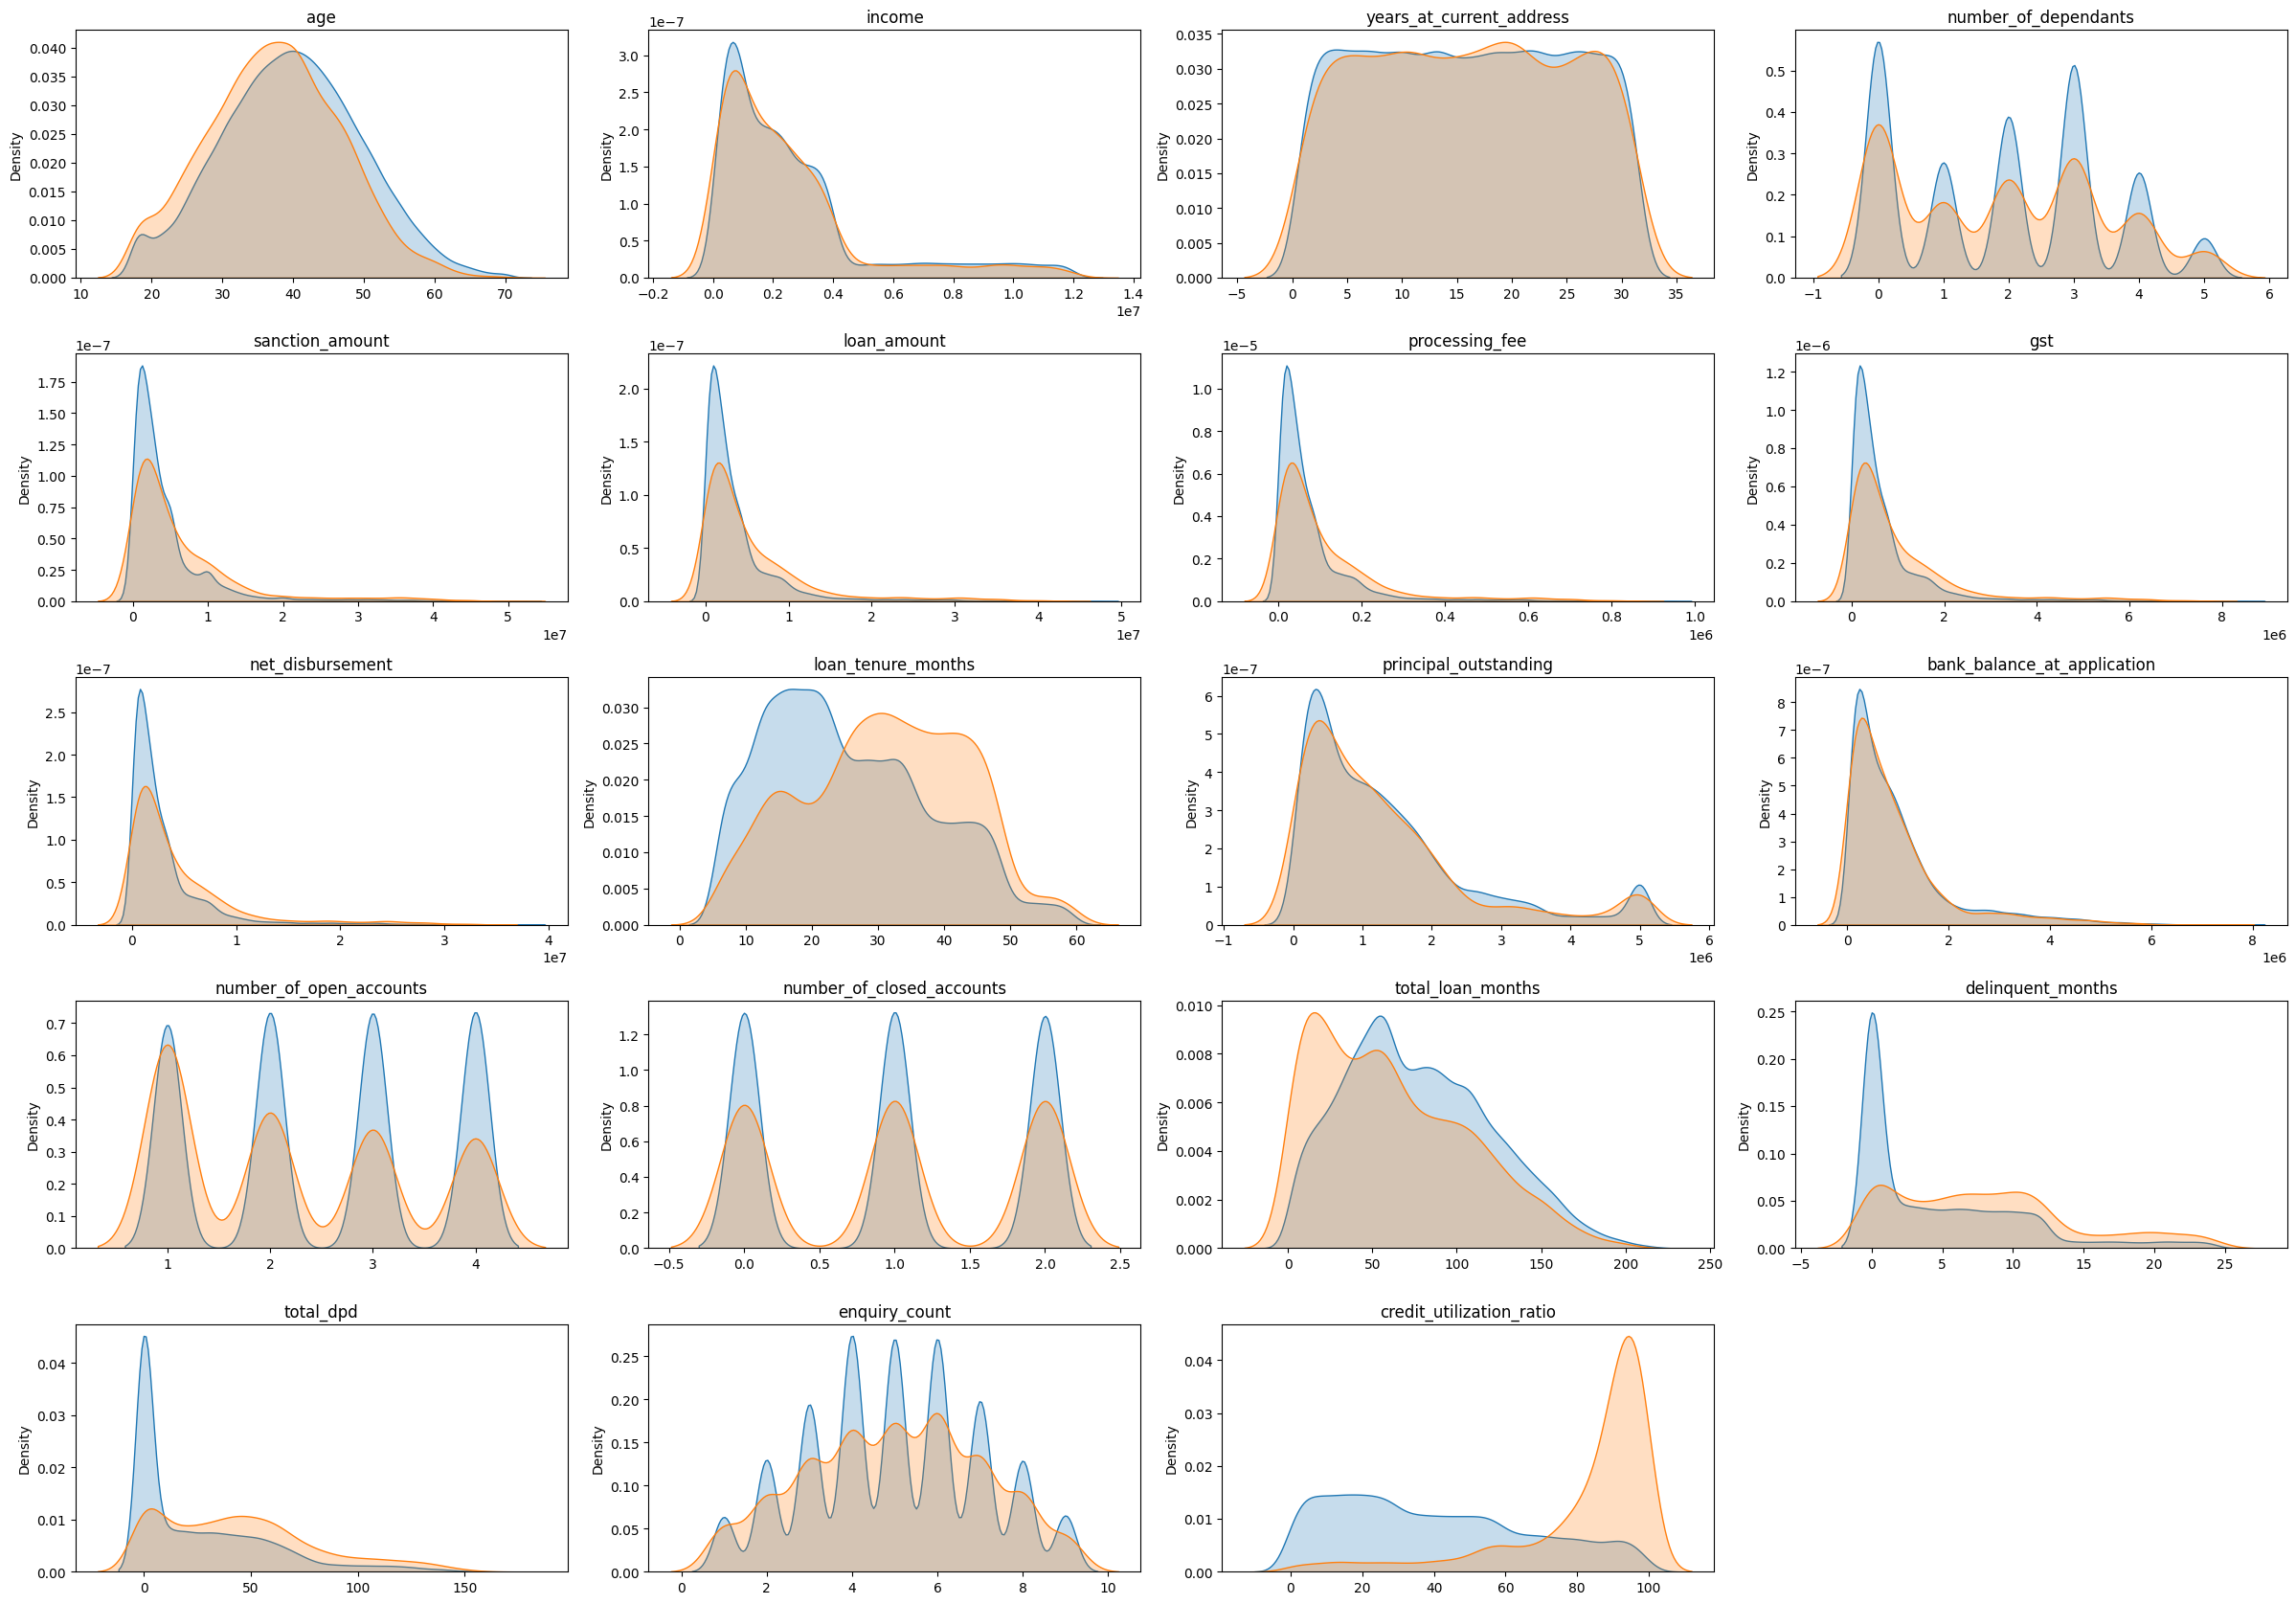

In [37]:
plt.figure(figsize=(24, 20))  # Width, height in inches

for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i+1)  # 1 row, 4 columns, ith subplot
    sns.kdeplot(df_train_1[col][df_train_1['default']==0], fill=True, label='default=0')
    sns.kdeplot(df_train_1[col][df_train_1['default']==1], fill=True, label='default=1')
    plt.title(col)        
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

**Insights**

1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
1. In remaining columns the distributions do not give any obvious insights
1. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later

<h3 align='center' style='color:blue'>Feature Engineering</h3>

### Generate Loan to Income Ratio (LTI)

In [38]:
df_train_1[['loan_amount', 'income']].head(2)

,loan_amount,income
27434,3276000,1131000
13400,2540000,2343000


In [39]:
df_train_1['loan_to_income'] = round(df_train_1['loan_amount']/df_train_1['income'],2)
df_train_1['loan_to_income'].describe()

count   37487.00
mean        1.55
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.45
max         4.57
Name: loan_to_income, dtype: float64

In [40]:
df_test['loan_to_income'] = round(df_test['loan_amount']/df_test['income'],2)

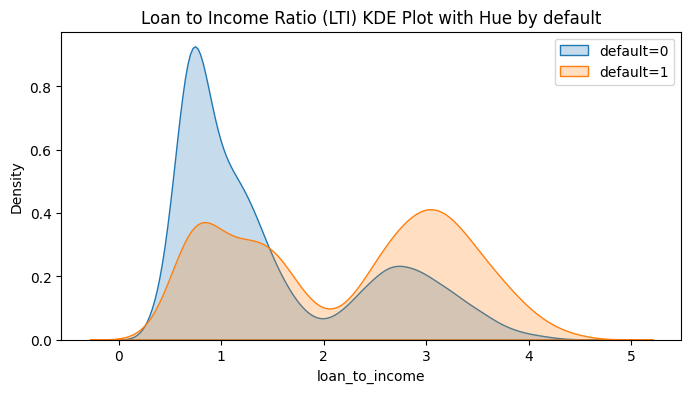

In [41]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Loan to Income Ratio (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**
1. Blue graph has majority of its values on lower side of LTI
2. Orange graph has many values when LTI is higher indicating that higher LTI means high risk loan

### Generate Delinquency Ratio

In [42]:
df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months']*100 / df_train_1['total_loan_months']).round(1)
df_test['delinquency_ratio'] = (df_test['delinquent_months']*100 / df_test['total_loan_months']).round(1)

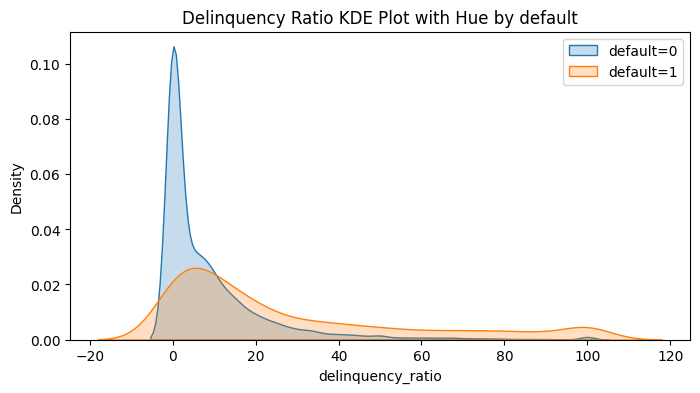

In [43]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**
1. Blue graph has majority of its values on lower side of LTI
2. Orange graph has many values when delinquency ratio is higher indicating some correlation on default

### Generate Avg DPD Per Delinquency

In [44]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd'] / df_train_1['delinquent_months']).round(1),
    0
)

df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd'] / df_test['delinquent_months']).round(1),
    0
)

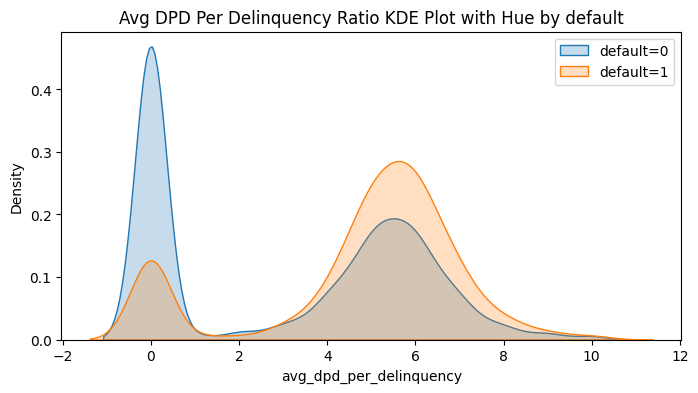

In [45]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

**Insights**

1. Graph clearly shows more occurances of default cases when avg_dpd_per_delinquency is high. This means this column is a strong predictor

### Remove columns that are just unique ids and don't have influence on target

In [46]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [47]:
df_train_2 = df_train_1.drop(['cust_id', 'loan_id'],axis="columns")
df_test = df_test.drop(['cust_id', 'loan_id'],axis="columns")

### Remove columns that business contact person asked us to remove

In [48]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [49]:
df_train_3.select_dtypes(['int64', 'float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

### VIF to measure multicolinearity

In [50]:
X_train = df_train_3.drop('default', axis='columns')
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = X_train.select_dtypes(['int64', 'float64']).columns

scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00,37487.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#### Same transformation on test set

In [51]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00,12498.00
mean,0.41,0.39,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.51,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.24,0.25,0.13,0.37,0.41,0.26,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.36,0.20,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.75,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,0.95,1.00,1.00,1.00,1.00,1.00,0.88,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [53]:
X_train.head(2)

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
27434,0.52,F,Single,Salaried,0.00,Owned,0.13,Ahmedabad,Gujarat,0.46,...,0.34,0.18,0.07,1.00,1.00,0.88,0.60,0.61,0.07,0.55
13400,0.21,M,Single,Salaried,0.00,Owned,0.80,Delhi,Delhi,0.00,...,0.51,0.20,0.12,0.67,0.50,0.38,0.93,0.18,0.03,0.42


In [54]:
calculate_vif(X_train[cols_to_scale])

C:\Users\Ayush Rajput\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.72
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.79
4,sanction_amount,102.15
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.14
9,principal_outstanding,16.28


In [55]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']


X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [56]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.45
1,number_of_dependants,2.73
2,years_at_current_address,3.41
3,zipcode,3.77
4,loan_tenure_months,5.98
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.32
7,number_of_closed_accounts,2.35
8,enquiry_count,6.37
9,credit_utilization_ratio,2.92


In [57]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

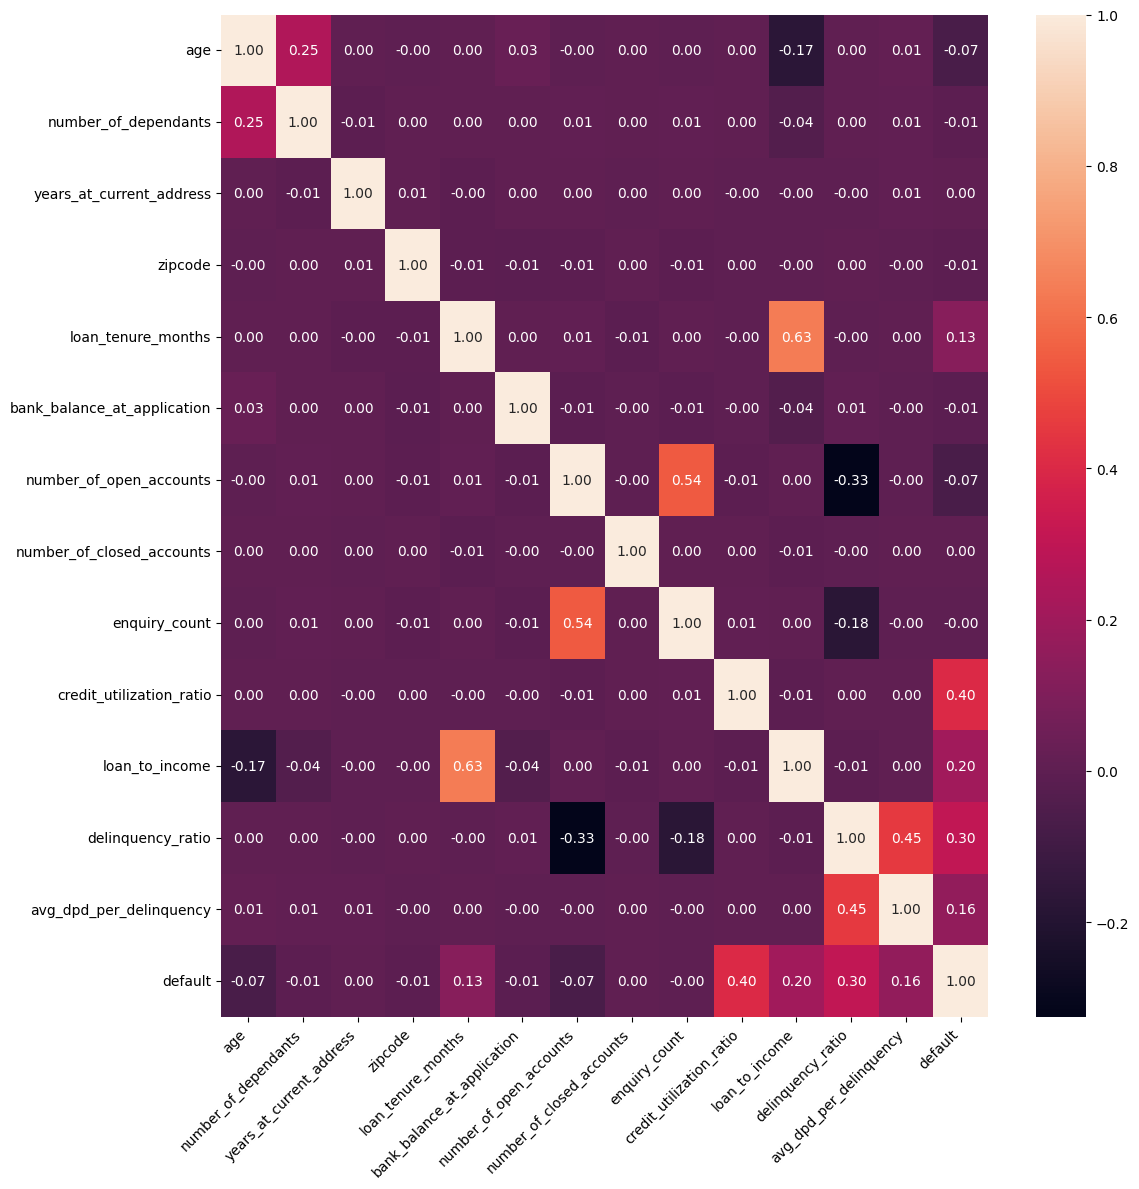

In [58]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Feature Selection: Categorical Features

In [59]:
X_train_1.head()

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_type,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
27434,0.52,F,Single,Salaried,0.00,Owned,0.13,Ahmedabad,Gujarat,0.46,...,Secured,0.34,0.07,1.00,1.00,0.88,0.60,0.61,0.07,0.55
13400,0.21,M,Single,Salaried,0.00,Owned,0.80,Delhi,Delhi,0.00,...,Secured,0.51,0.12,0.67,0.50,0.38,0.93,0.18,0.03,0.42
883,0.62,F,Single,Self-Employed,0.00,Mortgage,0.93,Lucknow,Uttar Pradesh,0.20,...,Unsecured,0.25,0.10,0.33,0.50,0.38,0.84,0.08,0.17,0.56
7303,0.48,F,Single,Self-Employed,0.20,Owned,0.87,Bangalore,Karnataka,0.76,...,Secured,0.28,0.01,0.00,0.50,0.50,0.34,0.19,0.00,0.00
45124,0.25,F,Single,Salaried,0.00,Owned,0.87,Jaipur,Rajasthan,0.33,...,Secured,0.74,0.01,0.33,0.00,0.50,0.19,0.36,0.10,0.47


### Calculate WOE and IV

In [60]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()
    
    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] -grouped['bad_pct'])*grouped['woe']
    
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)
    
    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7437,314,7123,0.10,0.21,-0.75,0.08
Education,5626,546,5080,0.17,0.15,0.14,0.00
Home,11271,1744,9527,0.55,0.28,0.68,0.18
Personal,13153,585,12568,0.18,0.37,-0.69,0.13


In [61]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37487 non-null  float64
 1   gender                       37487 non-null  object 
 2   marital_status               37487 non-null  object 
 3   employment_status            37487 non-null  object 
 4   number_of_dependants         37487 non-null  float64
 5   residence_type               37487 non-null  object 
 6   years_at_current_address     37487 non-null  float64
 7   city                         37487 non-null  object 
 8   state                        37487 non-null  object 
 9   zipcode                      37487 non-null  float64
 10  loan_purpose                 37487 non-null  object 
 11  loan_type                    37487 non-null  object 
 12  loan_tenure_months           37487 non-null  float64
 13  bank_balance_at_a

In [62]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

{'age': np.float64(0.07592687127752061),
 'gender': np.float64(0.000482276463421216),
 'marital_status': np.float64(0.002196681370832318),
 'employment_status': np.float64(0.002447818101774487),
 'number_of_dependants': np.float64(0.00364589452118596),
 'residence_type': np.float64(0.2594019617563985),
 'years_at_current_address': np.float64(0.001042536380353028),
 'city': np.float64(0.000817870465334103),
 'state': np.float64(0.0007881984519711978),
 'zipcode': np.float64(0.0007436024782513755),
 'loan_purpose': np.float64(0.39377543144164784),
 'loan_type': np.float64(0.17304705897793143),
 'loan_tenure_months': np.float64(0.23450610202970526),
 'bank_balance_at_application': np.float64(0.004242001247914226),
 'number_of_open_accounts': np.float64(0.07324250836253295),
 'number_of_closed_accounts': np.float64(0.00026280824021760536),
 'enquiry_count': np.float64(0.005484982638303533),
 'credit_utilization_ratio': np.float64(2.4228228499400095),
 'loan_to_income': np.float64(0.4915664

In [63]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.423
19,delinquency_ratio,0.678
18,loan_to_income,0.492
20,avg_dpd_per_delinquency,0.421
10,loan_purpose,0.394
5,residence_type,0.259
12,loan_tenure_months,0.235
11,loan_type,0.173
0,age,0.076
14,number_of_open_accounts,0.073


In [64]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

### Feature Encoding

In [65]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [66]:
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
27434,0.519,0.340,1.000,0.596,0.609,0.067,0.550,True,False,False,True,False,False
13400,0.212,0.509,0.667,0.929,0.183,0.034,0.420,True,False,False,False,False,False
883,0.615,0.245,0.333,0.838,0.084,0.169,0.560,False,False,False,False,True,True


In [67]:
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)
X_test_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
33553,0.346,0.528,0.333,0.121,0.258,0.043,0.900,True,False,True,False,False,False
9427,0.288,0.623,1.000,0.859,0.689,0.000,0.000,True,False,False,True,False,False
199,0.192,0.623,1.000,0.727,0.635,0.000,0.000,True,False,False,True,False,False


<h3 align="center" style="color:blue">Model Training</h3>

### Attempt 1

1. Logistic Regression, RandomForest & XGB
1. No handling of class imbalance

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



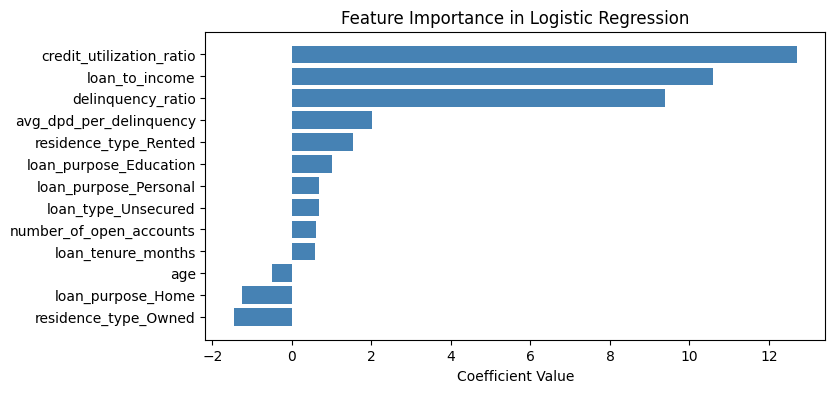

In [69]:
feature_importance = model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [70]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.70      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [71]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11390
           1       0.82      0.74      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.86      0.88     12498
weighted avg       0.96      0.96      0.96     12498



Since there is not much difference between XGB and Logistic, we will choose LogisticRegression as a candidate for our RandomizedSearchCV candidate it has a better interpretation.

#### RandomizedSearch CV for Attempt 1: Logistic Regression

In [72]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'lbfgs', 'C': np.float64(545.5594781168514)}
Best Score: 0.7629160071967581
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



#### RandomizedSearch CV for Attempt 1: XGBoost

In [73]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Score: 0.7916996030173474
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.78      0.82      0.80      1108

    accuracy                           0.96     12498
   macro avg       0.88      0.90      0.89     12498
weighted avg       0.96      0.96      0.96     12498



### Attempt 2

1. Logistic Regression & XGB
1. Handle Class Imbalance Using Under Sampling

In [74]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_encoded, y_train)
y_train_res.value_counts()

default
0    3189
1    3189
Name: count, dtype: int64

In [75]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     11390
           1       0.53      0.95      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.93      0.82     12498
weighted avg       0.95      0.92      0.93     12498



In [76]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11390
           1       0.54      0.98      0.69      1108

    accuracy                           0.92     12498
   macro avg       0.77      0.95      0.82     12498
weighted avg       0.96      0.92      0.93     12498



### Attempt 3

1. Logistic Regression
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [77]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34223
1    34223
Name: count, dtype: int64

In [78]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [79]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [80]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-04-29 08:21:57,526] A new study created in memory with name: no-name-72550725-698a-44eb-a0f7-d1aa03f21268
[I 2025-04-29 08:22:01,051] Trial 0 finished with value: 0.9271813271550421 and parameters: {'C': 0.021553781951080486, 'solver': 'liblinear', 'tol': 0.0017904817171651467, 'class_weight': None}. Best is trial 0 with value: 0.9271813271550421.
[I 2025-04-29 08:22:04,622] Trial 1 finished with value: 0.9418669847108742 and parameters: {'C': 0.16350219751324824, 'solver': 'saga', 'tol': 0.0006036892965055366, 'class_weight': None}. Best is trial 1 with value: 0.9418669847108742.
[I 2025-04-29 08:22:05,206] Trial 2 finished with value: 0.9448575382452411 and parameters: {'C': 3.890227052773255, 'solver': 'liblinear', 'tol': 0.017118448238779574, 'class_weight': None}. Best is trial 2 with value: 0.9448575382452411.
[I 2025-04-29 08:22:05,805] Trial 3 finished with value: 0.9447893009089562 and parameters: {'C': 133.2492330158581, 'solver': 'saga', 'tol': 0.004923255995154245, 

In [81]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9449936575256247
  Params: 
    C: 71.27215466364484
    solver: lbfgs
    tol: 0.00029287018703299443
    class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.93      0.83     12498
weighted avg       0.96      0.93      0.94     12498



### Attempt 4

1. XGBoost
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [82]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-04-29 08:23:18,572] A new study created in memory with name: no-name-3876ae84-c9f7-4e7c-86da-164e10f217da
[I 2025-04-29 08:23:20,829] Trial 0 finished with value: 0.9622681340854529 and parameters: {'lambda': 4.380943117311594, 'alpha': 0.10597128270094461, 'subsample': 0.4516768590715212, 'colsample_bytree': 0.5460750249056191, 'max_depth': 6, 'eta': 0.13938072611513588, 'gamma': 7.711453956709474, 'scale_pos_weight': 2.169625765427755, 'min_child_weight': 1, 'max_delta_step': 3}. Best is trial 0 with value: 0.9622681340854529.
[I 2025-04-29 08:23:23,261] Trial 1 finished with value: 0.9627139798483434 and parameters: {'lambda': 0.31577415093029404, 'alpha': 3.038356142641037, 'subsample': 0.7166409060398902, 'colsample_bytree': 0.610896844036239, 'max_depth': 7, 'eta': 0.18929671723605307, 'gamma': 6.684810888093297, 'scale_pos_weight': 6.018015468918149, 'min_child_weight': 8, 'max_delta_step': 6}. Best is trial 1 with value: 0.9627139798483434.
[I 2025-04-29 08:23:25,945] T

In [83]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9763274426170586
  Params: 
    lambda: 1.1545173955317256
    alpha: 0.0031866138101045534
    subsample: 0.81050304603931
    colsample_bytree: 0.9007202745545603
    max_depth: 9
    eta: 0.259470506839864
    gamma: 1.2624724926769468
    scale_pos_weight: 1.020817417538436
    min_child_weight: 4
    max_delta_step: 10
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11390
           1       0.75      0.82      0.78      1108

    accuracy                           0.96     12498
   macro avg       0.87      0.90      0.88     12498
weighted avg       0.96      0.96      0.96     12498



### Model Evaluation : ROC/AUC

In [84]:
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.93      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [85]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

fpr[:5], tpr[:5], thresholds[:5]

(array([0.       , 0.       , 0.       , 0.0000878, 0.0000878]),
 array([0.        , 0.00090253, 0.21028881, 0.21028881, 0.21750903]),
 array([       inf, 0.99999995, 0.99884807, 0.99884665, 0.99875595]))

In [86]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

np.float64(0.982955946536166)

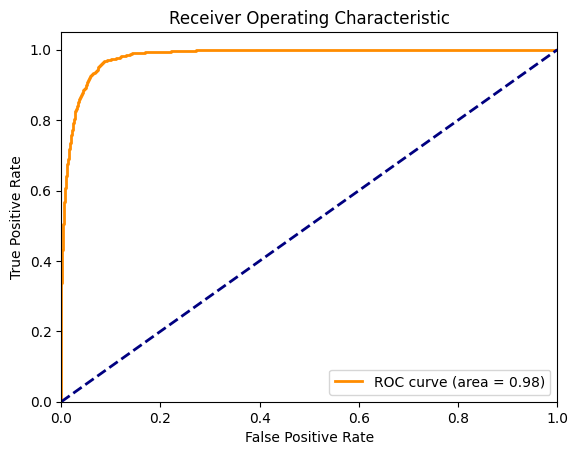

In [87]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Model Evaluation : Rankordering, KS statistic, Gini coeff

In [88]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
33553,0,0.000
9427,0,0.770
199,0,0.131


In [89]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
33553,0,0.000,1
9427,0,0.770,8
199,0,0.131,7


In [90]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count   1250.000
mean       0.491
std        0.187
min        0.203
25%        0.323
50%        0.477
75%        0.659
max        0.821
Name: Default Probability, dtype: float64

In [91]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\Ayush Rajput\AppData\Local\Temp\ipykernel_2728\4037021561.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1250.000
3,3,0.000,0.000,0.000,1249.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.005,1.000,1249.000
6,6,0.005,0.031,2.000,1247.000
7,7,0.031,0.202,16.000,1234.000
8,8,0.203,0.821,170.000,1080.000
9,9,0.821,1.000,919.000,331.000


In [92]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1250.000,0.000,100.000
3,3,0.000,0.000,0.000,1249.000,0.000,100.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
5,5,0.001,0.005,1.000,1249.000,0.080,99.920
6,6,0.005,0.031,2.000,1247.000,0.160,99.840
7,7,0.031,0.202,16.000,1234.000,1.280,98.720
8,8,0.203,0.821,170.000,1080.000,13.600,86.400
9,9,0.821,1.000,919.000,331.000,73.520,26.480


In [93]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.821,1.000,919.000,331.000,73.520,26.480
1,8,0.203,0.821,170.000,1080.000,13.600,86.400
2,7,0.031,0.202,16.000,1234.000,1.280,98.720
3,6,0.005,0.031,2.000,1247.000,0.160,99.840
4,5,0.001,0.005,1.000,1249.000,0.080,99.920
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000
7,2,0.000,0.000,0.000,1250.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [94]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.821,1.000,919.000,331.000,73.520,26.480,919.000,331.000
1,8,0.203,0.821,170.000,1080.000,13.600,86.400,1089.000,1411.000
2,7,0.031,0.202,16.000,1234.000,1.280,98.720,1105.000,2645.000
3,6,0.005,0.031,2.000,1247.000,0.160,99.840,1107.000,3892.000
4,5,0.001,0.005,1.000,1249.000,0.080,99.920,1108.000,5141.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000


In [95]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.821,1.000,919.000,331.000,73.520,26.480,919.000,331.000,82.942,2.906
1,8,0.203,0.821,170.000,1080.000,13.600,86.400,1089.000,1411.000,98.285,12.388
2,7,0.031,0.202,16.000,1234.000,1.280,98.720,1105.000,2645.000,99.729,23.222
3,6,0.005,0.031,2.000,1247.000,0.160,99.840,1107.000,3892.000,99.910,34.170
4,5,0.001,0.005,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000


In [96]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.821,1.000,919.000,331.000,73.520,26.480,919.000,331.000,82.942,2.906,80.036
1,8,0.203,0.821,170.000,1080.000,13.600,86.400,1089.000,1411.000,98.285,12.388,85.897
2,7,0.031,0.202,16.000,1234.000,1.280,98.720,1105.000,2645.000,99.729,23.222,76.507
3,6,0.005,0.031,2.000,1247.000,0.160,99.840,1107.000,3892.000,99.910,34.170,65.739
4,5,0.001,0.005,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136,54.864
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111,43.889
6,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076,32.924
7,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051,21.949
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025,10.975
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000,0.000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)


In [97]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.982955946536166
Gini Coefficient: 0.965911893072332


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

#### Finalize The Model and Visualize Feature Importance

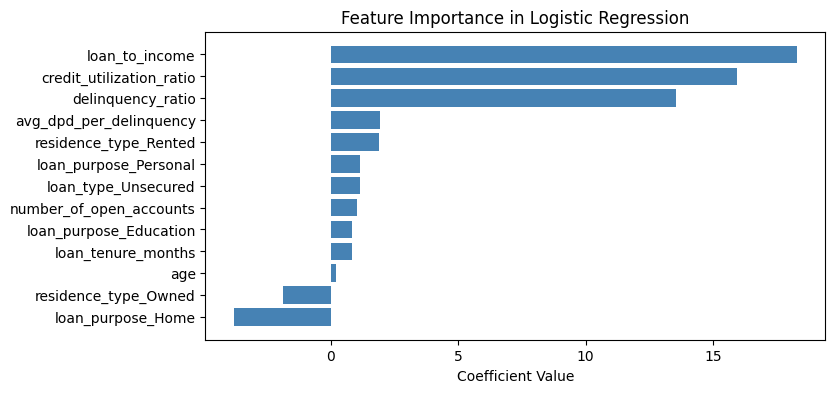

In [98]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Save the Model

In [99]:
X_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
33553,0.346,0.528,0.333,0.121,0.258,0.043,0.900,True,False,True,False,False,False
9427,0.288,0.623,1.000,0.859,0.689,0.000,0.000,True,False,False,True,False,False


In [100]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [101]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [102]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [104]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']

In [105]:
final_model.coef_, final_model.intercept_

(array([[ 0.23078618,  0.8271334 ,  1.04005156, 15.93549351, 18.30387972,
         13.54335384,  1.92174197, -1.87974476,  1.88587403,  0.84238211,
         -3.80154688,  1.13791695,  1.13791695]]),
 array([-21.01575985]))